In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import gc

rc={'axes.labelsize': 15.0,
    'font.size': 15.0, 'legend.fontsize': 15.0, 
    'axes.titlesize': 15.0,
    'xtick.labelsize': 15.0,
    'ytick.labelsize': 15.0}
plt.rcParams.update(**rc)

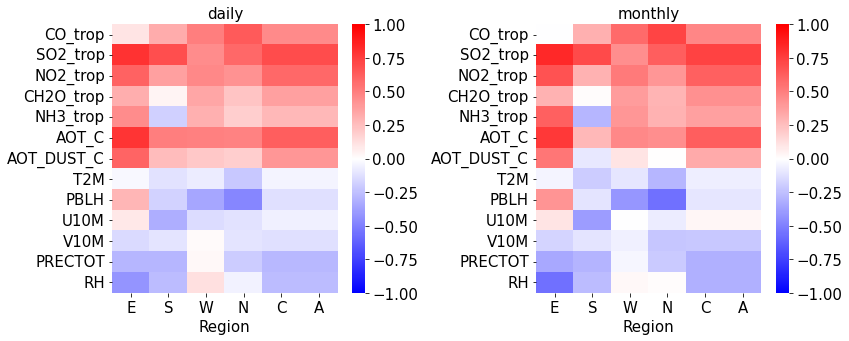

In [2]:
fig = plt.figure(figsize=(12,5))
t_ls = ["daily","monthly"]
for i in range(len(t_ls)):
    t = t_ls[i]
    ax = plt.subplot(1,2,i+1)
    df_train = pd.read_parquet('../data/c_r_'+t+'_train.gzip')
    feature_dict = {
    "gas":['CO_trop', 'SO2_trop', 'NO2_trop', 'CH2O_trop', 'NH3_trop'],
    "aod":['AOT_C', 'AOT_DUST_C'],
    "met":['T2M', 'PBLH', 'U10M', 'V10M', 'PRECTOT', 'RH']}
    # ref https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-a-list-of-lists
    feature_ls = sum([feature_dict[k] for k in ["gas","aod","met"]],[])
    var = ["PM25"]+feature_ls
    for region in ["E","S","W","N"]:
    #     print(region)
        corr = df_train[df_train["region"]==region][var].corr(method='spearman')
        if region == "E":
            col_tmp = corr[["PM25"]].rename(columns={"PM25":"E"})[1:]
        else:
            col_tmp[region] = corr[["PM25"]].rename(columns={"PM25":region})[1:]

    corr = df_train[var].corr(method='spearman')
    col_tmp["C"] = corr[["PM25"]].rename(columns={"PM25":"C"})[1:]
    del df_train
    gc.collect()
    
    df_train = pd.read_parquet('../data/'+t+'_train.gzip')
    corr = df_train[var].corr(method='spearman')
    col_tmp["A"] = corr[["PM25"]].rename(columns={"PM25":"A"})[1:]
    del df_train
    gc.collect()  
        
    g = sns.heatmap(col_tmp, ax=ax, cmap="bwr",vmin=-1,vmax=1)
    ax.set_title(t)
    ax.set_xlabel("Region")
        
plt.tight_layout()
plt.savefig("../figures/fig6_spearman_correlation.pdf")
plt.show()